# **<span style="color: #87CEEB;"> CS437/CS5317/EE414/EE513 Deep Learning Programming Assignment 1</span>**

# <span style="color: #9370DB;">**Submission Guidelines**</span>

- <span style="color: #9370DB;">Please rename the file to `<RollNumber>_PA1_1`.</span>
- <span style="color: #9370DB;">Please also submit a **.py** file of every Notebook. You can do this by exporting your **ipynb** to a Python script.</span>
- <span style="color: #9370DB;">Please submit a zipped folder of both your Jupyter Notebooks and Python script files.</span>




### Name:
### Roll Number:

<h1><b> Part 1 Task 1: Multi-Layer Perceptron (MLP) Implementation <span style="color: #9370DB;">(50 Points)</span></b></h1> 

# Differentiating Between '**<span style="color: #87CEEB;">X</span>**' and '**<span style="color: #87CEEB;">0</span>**' on a Graph

- Welcome to your Neural Networks assignment! In this task, you will build a simple neural network to classify points on a 2D graph as either 'X' or '0'. This is a classic **binary classification problem**, and it will help you understand the fundamentals of how neural networks learn to separate data.

## Objective
- Your goal is to create a neural network that can draw a decision boundary (a line or curve) on a 2D graph to separate points labeled as 'X' from those labeled as '0'.

## Task Overview
1. **Dataset**: You have been provided with a dataset of points on a 2D plane. Each point will be labeled as either 'X' or '0'. Your task is to use this dataset to train a neural network.
2. **Model Design**: You will design a Multi-Layer Perceptron (MLP) `from sratch` using Python and NumPy. This means you will implement the forward pass, backward pass (backpropagation), and weight updates manually. There will be constraints on the number of neurons and layers you can use. Your challenge is to figure out the best architecture and hyperparameters within these limits to solve the problem.
3. **Training**: You will train your model on the provided dataset and evaluate its performance by calculating metrics like accuracy and loss.
4. **Visualization**: Once trained, you will visualize the decision boundary created by your neural network to see how well it separates the 'X' and '0' points.

## Constraints
- **Strict Implementation Rules**:
  - You must implement the MLP `entirely from scratch` using only **Python** and **NumPy**.
  - **No high-level libraries** like TensorFlow, PyTorch, Keras, Scikit-learn, or any other pre-built machine learning libraries are allowed.
  - Using any of these libraries will result in **zero marks** for the assignment.
- **Architecture Limits**:
  - You will be given a maximum number of parameters that you can use in your MLP. Your goal is to design the most effective architecture within these limits
- **No Use of Artificial Intelligence Tools**:
  - **Do not use AI tools** like ChatGPT, Copilot, or any other AI-based code generation tools to complete this assignment (This Now includes Deepseek xD).
  - It is **very noticeable** when students use AI tools, and doing so will result in **zero marks**.
  - Using AI tools will not only harm your grade but also **deeply impact your understanding** of the material. You will face significant problems in future assignments and exams if you rely on AI instead of learning the concepts yourself.
- **Evaluation**:
  - Your model will be evaluated based on its ability to correctly classify the points and the clarity of the decision boundary it learns.


## Why These Constraints?
This assignment is designed to help you deeply understand the inner workings of neural networks. By implementing everything from scratch, you will gain a solid foundation in how neural networks learn and make predictions. It will also challenge you to think critically about architecture design and optimization.

---

# 1) Importing Libraries

You are **only allowed** to use the following libraries:
- **NumPy**: For numerical computations (e.g., matrix operations, random number generation).
- **Matplotlib**: For visualizing the dataset and the decision boundary.
- **Math**: For basic mathematical functions (e.g., `exp`, `log`).

### Study the Documentation

- Before starting the assignment, make sure to read the official documentation for the libraries you are allowed to use. This will help you use these tools effectively and avoid unnecessary complications.

### Documentation Links:
1. **NumPy**: [NumPy Documentation](https://numpy.org/doc/stable/)
2. **Matplotlib**: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
3. **Python Math Module**: [Math Module Documentation](https://docs.python.org/3/library/math.html)

**Take the time to study these resources carefully.**

### A Friendly Reminder
If you find yourself stuck, **refer back to the documentation** before trying to implement a solution from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 2) Understanding the Dataset

The `generate_problem` function is provided to you in the `dataset_generator.py` code file. This function is designed to generate the dataset for your assignment. Here's a detailed explanation of how the function works, what it outputs, and how you can use it in your code.



### How the `generate_problem` Function Works?

The `generate_problem` function creates a **2D dataset** of points, each labeled as either `'x'` or `'0'`. These points are generated on a 2D graph based on the type of problem you want to solve. The dataset contains the following:

1. **Features (X)**: A 2D NumPy array where each row represents a point on the 2D plane. Each point has two coordinates: x<sub>1</sub> and x<sub>2</sub>.
2. **Labels (y)**: A 1D NumPy array where each element corresponds to the label for a point in `X`. The label will be:
   - `1` for points classified as `'x'`.
   - `0` for points classified as `'0'`.



### Function Output

When you call `generate_problem(problem_id)`, the function will generate:
1. `X`: A 2D NumPy array of shape `(n_samples, 2)`, where `n_samples` is the number of points in the dataset.
2. `y`: A 1D NumPy array of shape `(n_samples,)` containing the labels (`1` or `0`).
3. `title`: A string that describes the type of problem being generated. This can be useful when visualizing the data.


## Problem IDs and Dataset Descriptions

The `generate_problem` function supports multiple types of datasets, each identified by a unique `problem_id`. The table below provides a high-level overview of the available datasets and their characteristics.

| Problem ID | Dataset Type           | Description                                                       |
|------------|------------------------|-------------------------------------------------------------------|
| **1**      | Linear Separation      | Points are distributed such that the two classes can be separated. |
| **2**      | Circular Boundary      | Points are distributed in a way that involves a circular relationship. |
| **3**      | XOR Pattern            | Points exhibit a pattern that requires non-linear classification. |
| **4**      | Spiral Pattern         | Points form an intricate, spiral-like distribution.               |
| **5**      | Moon Pattern           | Points form shapes with some curvature or arcs.                   |
| **6**      | Gaussian Mixture       | Points are grouped around specific regions or centers.            |
| **7**      | Checkerboard           | Points are arranged in a grid-like or alternating pattern.         |
| **8**      | High Noise             | Points are randomly scattered, with no clear pattern or grouping. |

---

### How to Use the Table
- **Choose a `problem_id`** from the table based on the dataset you want to generate.
- **Pass the `problem_id`** to the `generate_problem` function. For example:
  ```python
  X, y, title = generate_problem(3)  # Generates the dataset for Problem ID 3
```

Run the next block to visualise all the problems


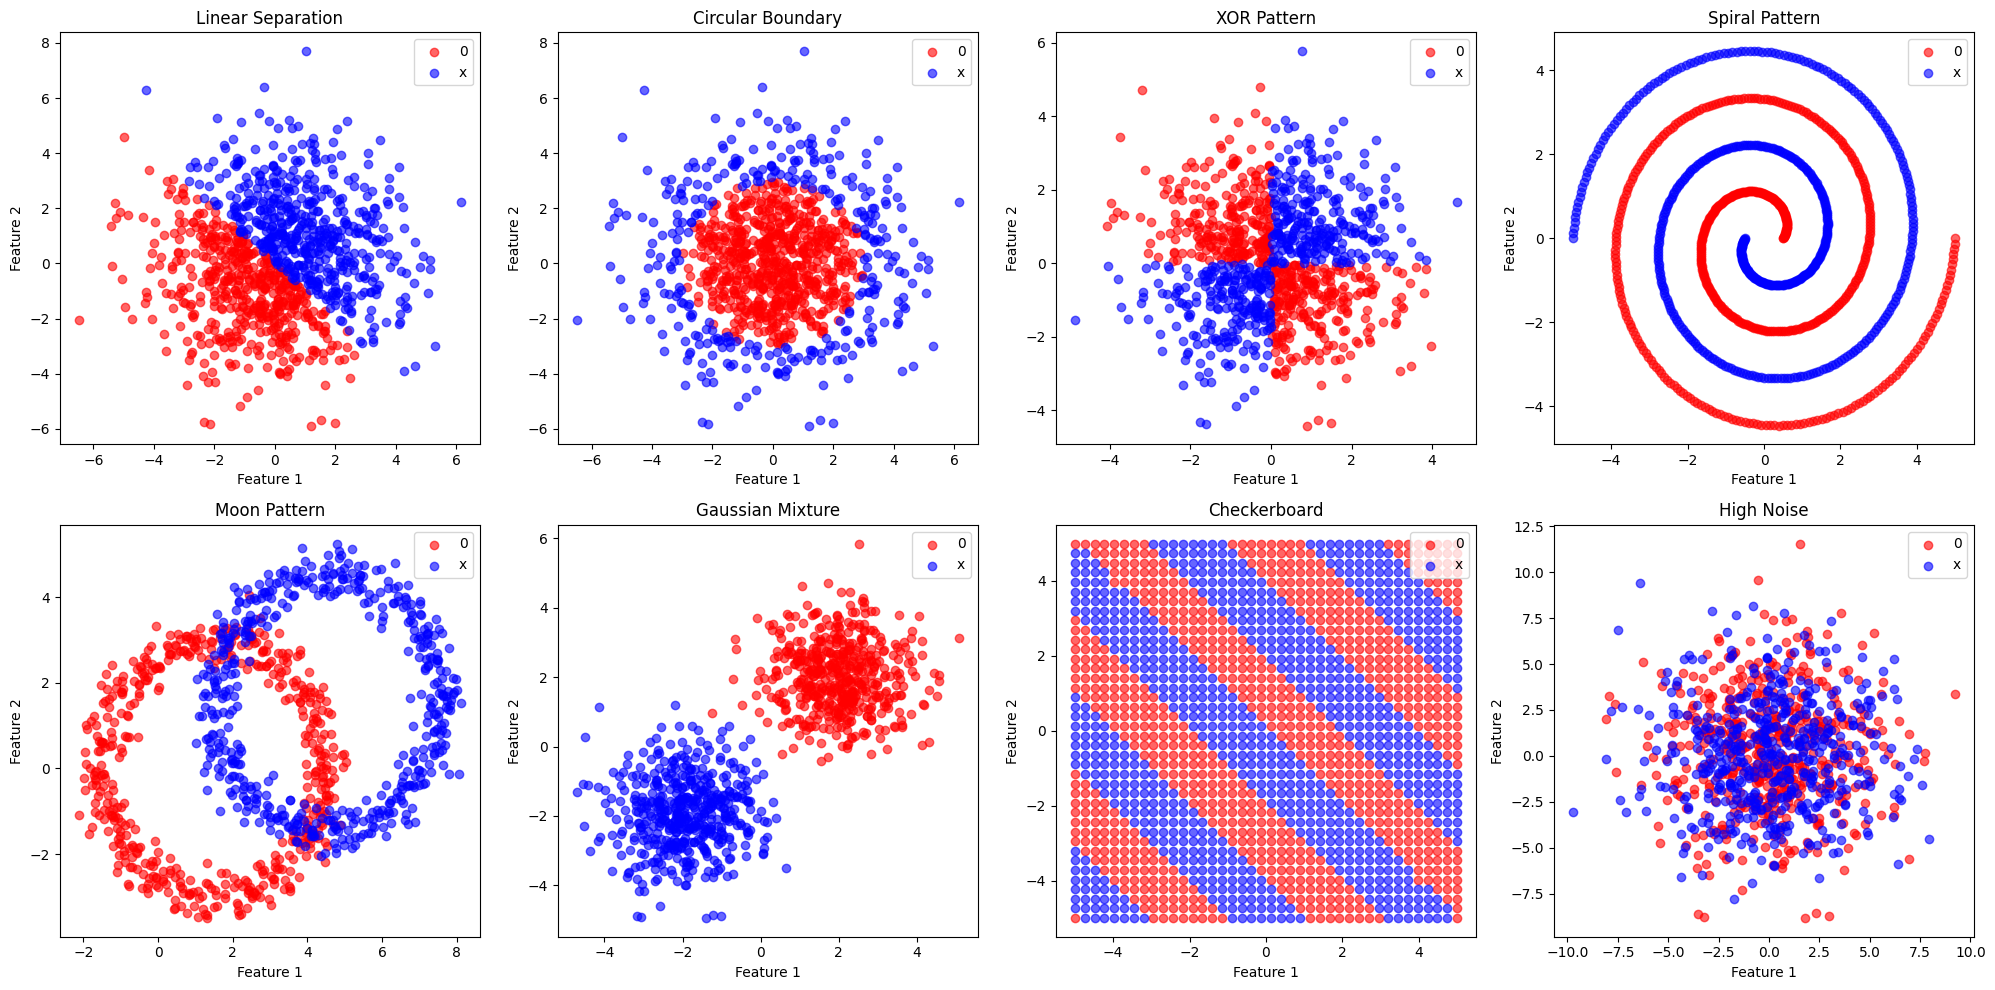

In [2]:
from dataset_generator import generate_problem

plt.figure(figsize=(20, 10))
for i in range(1, 9):
    X, y, title = generate_problem(problem_id=i)
    plt.subplot(2, 4, i)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='0', alpha=0.6)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='x', alpha=0.6)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
plt.tight_layout()
plt.show()

# 3) Implementing the Multi-Layer Perceptron (MLP)

Now let's implement the **Multi-Layer Perceptron (MLP)** class from scratch using only Python and NumPy. Below, you will find detailed specifications for each component you need to implement. Follow the instructions carefully and ensure you adhere to the constraints and requirements. Marks will be deducted if you do not follow the required specifications.

## Class Overview

You will create a class called `MLP` with the following features:
1. **Initialization (`__init__`)**:
   - Define the network structure using `layer_sizes`, a list where each element represents the number of neurons in a layer (e.g., `[2, 16, 1]` for 2 input neurons, 16 in the hidden layer, and 1 output neuron).
   - Initialize weights and biases for each layer:
     - Use **He initialization** for layers with ReLU or Leaky ReLU activation.
     - Use **Xavier initialization** for layers with sigmoid or tanh activation.
     - Ensure the weights are initialized as small random values scaled appropriately for the activation function.
     - Initialize biases to zeros.
   - Allow the user to specify the activation function (`relu`, `leaky_relu`, `tanh`, or `sigmoid`) and a learning rate.
   - Include a parameter `alpha` to define the slope of Leaky ReLU.

2. **Forward Pass (`forward`)**:
   - Implement the forward pass through the network.
   - For hidden layers, apply the activation function specified during initialization.
   - Use **sigmoid activation** for the output layer.

3. **Backward Pass (`backward`)**:
   - Implement backpropagation to compute gradients for weights and biases.
   - Use the appropriate derivative of the activation function for each layer.
   - Compute the gradients for each layer using the chain rule.

4. **Parameter Updates (`update_parameters`)**:
   - Update the weights and biases using gradient descent.
   - Subtract the product of the learning rate and the computed gradients from the current weights and biases.

5. **Loss Function (`compute_loss`)**:
   - Use the binary cross-entropy loss to evaluate the model's performance.
   - Add a small value to avoid taking the log of zero.

6. **Accuracy Metric (`compute_accuracy`)**:
   - Compute the accuracy of the predictions by comparing them with the true labels.

7. **Training Loop (`train`)**:
   - Implement a training loop to:
     - Shuffle the dataset at the start of each epoch.
     - Divide the dataset into mini-batches for training.
     - Perform a forward pass, backward pass, and parameter updates for each mini-batch.
     - Print the loss and accuracy periodically. (it is not necessary to print loss and accuracy after every epoch)

In [ ]:
class MLP:
    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01, alpha = 0.01):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        # Code Here

    # Do not change this code.
    def get_num_parameters(self):
        num_params = 0
        for W, b in zip(self.weights, self.biases):
            num_params += W.size + b.size
        return num_params

    # Code Other Functions Here

# Moving onto the real problem

Now that you’ve implemented the `MLP` class, it’s time to test it. Your task is to train your neural network on this dataset and visualize how well it separates the two classes. 
For each problem: 
1) Print `loss` and `accuracy` after a reasonable number of epochs,
2) print the `total number of parameters` and then 
3) `show a visualisation of your decision boundary`

In the next block you will find two helper functions.

#### **1. plot_decision_boundary**
This function is designed to visualize the decision boundary of a classification model in a 2D feature space. It plots the regions of the feature space classified into different classes and overlays the actual data points. Pass a trained model with a .forward() method, a 2D NumPy array X, binary labels y, and a title string to visualize the decision boundary and data points.

#### **2. prepare_data**
This function preprocesses the input data for a machine learning model. It normalizes the features and reshapes the target labels as needed. Pass X and y.

In [ ]:
# @title Helper Functions

# Call this function to visualise your decision boundary
def plot_decision_boundary(model, X, y, title):
    y = y.flatten()  # Convert y to 1D array
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Use darker colors and increase alpha for better visibility
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#FF4444', '#4444FF'], alpha=0.8)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='0', edgecolors='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='1', edgecolors='k')
    plt.title(title)
    plt.legend()
    plt.show()

# Call this function for data processing
def prepare_data(X, y):
    y = y.reshape(-1, 1)
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    return X, y

<h1><b> Part 1 Task 2: Build the Best Neural Network <span style="color: #9370DB;">(50 Points)</span></b></h1> 


### **`Activation Function Rules`**

Choose wisely!

1. **Tanh Activation Function:**
   - You are allowed to use **tanh** **only once** in this part.
2. **Sigmoid Activation Function:**
   - No restrictions on sigmoid.
3. **ReLU Activation Function:**
   - You can use **ReLU** at most **3 times** in this part.
4. **Leaky ReLU Activation Function:**
   - You are allowed to use **Leaky ReLU** at most **2 times** this part.

### **`Parameter Limits Per Problem`**

1. **Problem 1:**
   - **Parameter Limit:** **3**
   - This will test your ability to create an ultra-lightweight model. Choose your architecture wisely.

2. **Problem 2:**
   - **Parameter Limit:** **20**
   - Slightly more flexibility than Problem 1, but still extremely tight. Optimize every parameter!

3. **Problem 3:**
   - **Parameter Limit:** **20**
   - Similar to Problem 2, this is another opportunity to test your creativity with a small number of parameters.

4. **Problem 4:**
   - **Parameter Limit:** **160**
   - A significant jump in flexibility. Experiment with more complex architectures while still being mindful of efficiency.

5. **Problem 5:**
   - **Parameter Limit:** **110**
   - A slightly smaller limit than Problem 4, but still enough room to design a moderately complex network.

6. **Problem 6:**
   - **Parameter Limit:** **3**
   - Back to basics. This problem will challenge your ability to work under extreme constraints like Problem 1.

7. **Problem 7:**
   - **Parameter Limit:** **2500**
   - Maximum flexibility! Design a robust, high-capacity network to achieve the best possible performance.

8. **Problem 8:**
   - **Parameter Limit:** **20**
   - Another lightweight challenge. Think carefully about the problem and design choices.

### **`Mandatory Constraints`**

- You **must** use at least one of each activation function type (sigmoid, tanh, ReLU, Leaky ReLU).
- You **must** print the total number of parameters used.
- You can choose any combination of layers to structure your model.
- The task is to maximize the model’s accuracy on the dataset provided. For most problems your accruacy should be above **90%**.
- The network's depth, layer size, and combination of activations are up to you, but you **must** respect the activation function constraints.

### `Note` : Marks Will be deducted if your model is overfitting so please use a reasonable number of `Epochs`


## Problem # 1




In [ ]:
# Code here

## Problem # 2



In [ ]:
# Code here

## Problem # 3



In [ ]:
# Code here

## Problem # 4



In [ ]:
# Code here

## Problem # 5



In [ ]:
# Code here

## Problem # 6



In [ ]:
# Code here

## Problem # 7



In [ ]:
# Code here

## Problem # 8



In [ ]:
# Code here

# Report your findings!

We will **not** mark your notebook if you do not complete this section.

Report the total number of activation functions used in this part:

- Tanh:
- sigmoid:
- ReLU:
- Leaky ReLU:

**Performance Summary Table**

| Problem ID | Total Parameters | Accuracy (%) | Loss | Activation Function Used |
|------------|----------------|-------------|------|--------------|
| Problem 1  |                |             |      |              |
| Problem 2  |                |             |      |              |
| Problem 3  |                |             |      |              |
| Problem 4  |                |             |      |              |
| Problem 5  |                |             |      |              |
| Problem 6  |                |             |      |              |
| Problem 7  |                |             |      |              |
| Problem 8  |                |             |      |              |



### Q) `Last Question`, Briefly explain the results in Problem 8 (max 40 words):

# That's it you are done with this part! :)

